import pandas 

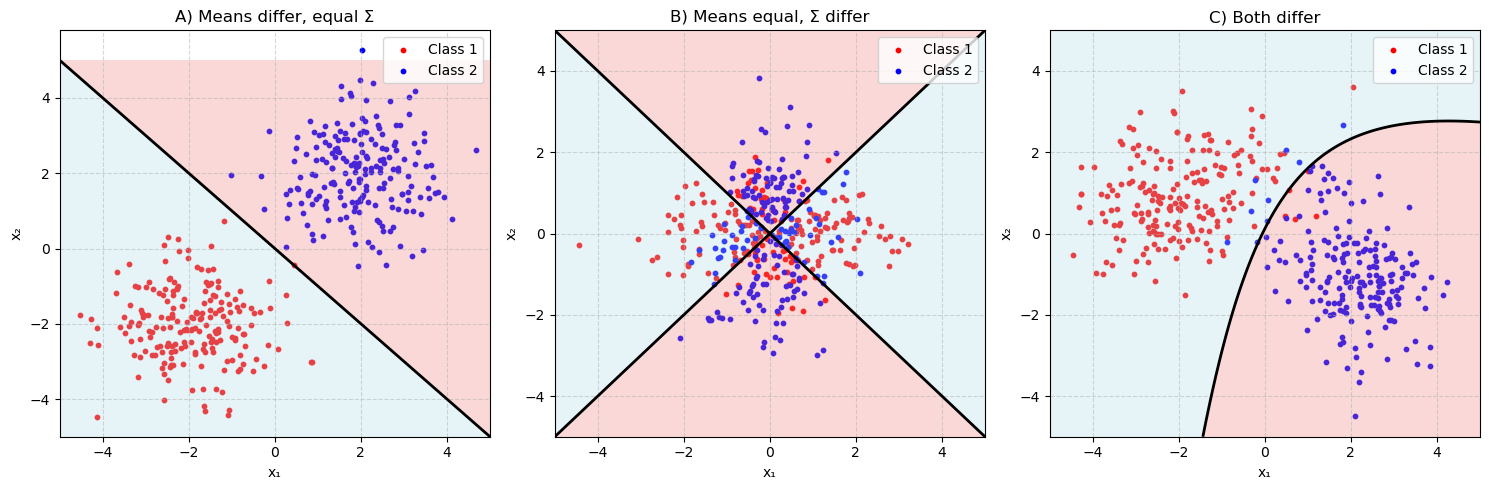

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_discriminant(mu1, Σ1, mu2, Σ2):
    """
    Returns δ(x, y) = ln p([x,y]|C1) - ln p([x,y]|C2)
    for two 2D Gaussians with means mu1, mu2 and covariances Σ1, Σ2.
    """
    Σ1_inv = np.linalg.inv(Σ1)
    Σ2_inv = np.linalg.inv(Σ2)
    log_det_ratio = 0.5 * np.log(np.linalg.det(Σ2) / np.linalg.det(Σ1))
    
    def δ(x, y):
        v = np.array([x, y])
        term1 = -0.5 * (v - mu1) @ Σ1_inv @ (v - mu1)
        term2 =  0.5 * (v - mu2) @ Σ2_inv @ (v - mu2)
        return term1 + term2 - log_det_ratio
    
    return δ

def plot_2d_decision_colored(delta, mu1, mu2, Σ1, Σ2, title, ax, n_samples=200):
    """
    Scatter-samples from two Gaussians, colors decision regions, and overlays δ=0.
    """
    # Sample points
    pts1 = np.random.multivariate_normal(mu1, Σ1, size=n_samples)
    pts2 = np.random.multivariate_normal(mu2, Σ2, size=n_samples)
    
    # Plot samples
    ax.scatter(pts1[:,0], pts1[:,1], s=10, c='red',  label='Class 1')
    ax.scatter(pts2[:,0], pts2[:,1], s=10, c='blue', label='Class 2')
    
    # Grid for boundary
    xx = np.linspace(-5, 5, 300)
    yy = np.linspace(-5, 5, 300)
    X, Y = np.meshgrid(xx, yy)
    Z = np.vectorize(delta)(X, Y)
    
    # Fill decision regions: red for δ>0, blue for δ<0
    ax.contourf(X, Y, Z, levels=[Z.min(), 0, Z.max()],
                colors=['lightcoral', 'lightblue'], alpha=0.3)
    # Contour δ=0
    ax.contour(X, Y, Z, levels=[0], colors='k', linewidths=2)
    
    ax.set_title(title)
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

# --- Scenario definitions ---

# A) Means differ, equal Σ
mu1_A = np.array([-2, -2])
mu2_A = np.array([ 2,  2])
Σ_A   = np.eye(2)
δA = gaussian_discriminant(mu1_A, Σ_A, mu2_A, Σ_A)

# B) Means equal, Σ differ
mu1_B = np.array([0, 0])
mu2_B = np.array([0, 0])
Σ1_B  = np.diag([2, 0.5])
Σ2_B  = np.diag([0.5, 2])
δB = gaussian_discriminant(mu1_B, Σ1_B, mu2_B, Σ2_B)

# C) Both means and Σ differ
mu1_C = np.array([-2, 1])
mu2_C = np.array([ 2,-1])
Σ1_C  = np.array([[1.5, 0.3], [0.3, 1]])
Σ2_C  = np.array([[1,  -0.4],[-0.4, 1.2]])
δC = gaussian_discriminant(mu1_C, Σ1_C, mu2_C, Σ2_C)

# --- Plotting ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plot_2d_decision_colored(δA, mu1_A, mu2_A, Σ_A,   Σ_A,   "A) Means differ, equal Σ", axes[0])
plot_2d_decision_colored(δB, mu1_B, mu2_B, Σ1_B,  Σ2_B,  "B) Means equal, Σ differ", axes[1])
plot_2d_decision_colored(δC, mu1_C, mu2_C, Σ1_C,  Σ2_C,  "C) Both differ", axes[2])

plt.tight_layout()
plt.show()
